## Using Zernike method in SimLight to generate fit its Zernike coefficients

### Step 1: Imports modules

In [1]:
import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.4



### Step 2: Configures the units and parameters

In [2]:
# units
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9
# parameters
wavelength = 0.6328 * µm  # wavelength of laser
size = 20 * mm  # size of measured surface
N = 401  # resolution
j = 15  # zernike orders to fit

### Step 3: Reads an aberrated surface data measured by PLP-PDI<sup>[1](https://www.osapublishing.org/ao/fulltext.cfm?uri=ao-56-29-8040)</sup>

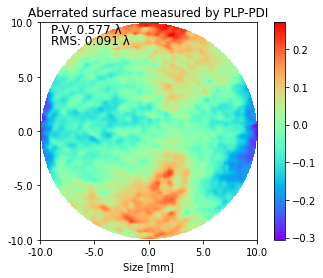

In [3]:
phase_file = 'data/2017060602.mat'
phase_key = 'phaseresult'
plppdi_phase = sl.phase_mat2array(phase_file, phase_key, wavelength, size)
F_plppdi = slpl.plot_wavefront(plppdi_phase, mask_r=1, title='Aberrated surface measured by PLP-PDI', return_data=True)

### Step 4: Fits Zernike coefficients

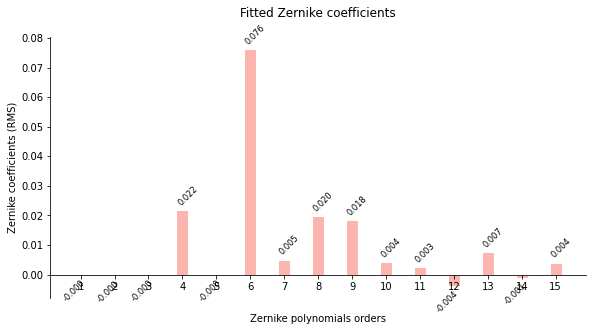

In [4]:
fitted_coeffs = sl.zernike_coeffs(F_plppdi, j, wavelength=wavelength)
slpl.plot_zernike_coeffs(fitted_coeffs, title='Fitted Zernike coefficients')

### Step 5: Generates the surface by fitted Zernike coefficients

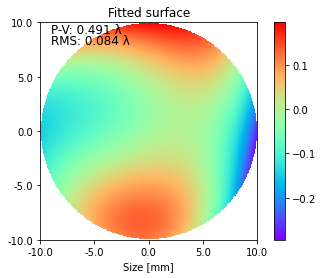

In [5]:
F = sl.PlaneWave(wavelength, size, N)
Z = sl.zernike.ZernikeCoefficients(j, fitted_coeffs)
F_fitted = sl.aberration(F, Z)
F_fitted = sl.circle_aperture(F_fitted)
F_fitted.plot_wavefront(mask_r=1, title='Fitted surface')

### Step 6: Shows remaining aberration

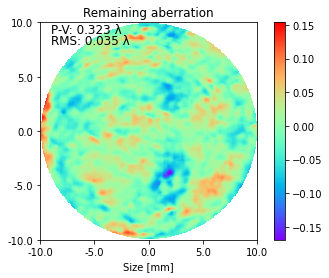

In [6]:
slpl.plot_wavefront_diff(F_plppdi, F_fitted, title='Remaining aberration')